In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
file_path = r"C:\Users\punch\OneDrive\Desktop\python results\alldata_sed.csv"  # Use raw string literal

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(data.head())


   Unnamed: 0       date site  Temp_mean  SpCond_mean  DO_mean  pH_mean  \
0          31  12/8/2013    1        NaN          NaN      NaN      NaN   
1          32  12/8/2013    2        NaN          NaN      NaN      NaN   
2          33  12/8/2013    4        NaN          NaN      NaN      NaN   
3          34  12/8/2013    5        NaN          NaN      NaN      NaN   
4          35  12/8/2013    6        NaN          NaN      NaN      NaN   

   Cond_mean  DO_satu_mean  Salinity_mean  ...          Si        Ag  \
0        NaN           NaN            NaN  ...  564.795791       NaN   
1        NaN           NaN            NaN  ...  676.776547       NaN   
2        NaN           NaN            NaN  ...  925.034382  1.683192   
3        NaN           NaN            NaN  ...  565.075567       NaN   
4        NaN           NaN            NaN  ...  865.448475       NaN   

            Na          Sr  Tl  Sn         Ti          V          Zn  \
0   356.354099   16.993471 NaN NaN   6.70631

In [12]:

# Define columns to keep
columns_to_keep = ['date', 'site', 'Salinity_mean', 'As', 'Cd', 'Cr', 'Cu', 'Pb', 'Ag', 'Zn']

# Verify the available columns
print(data.columns)

# Select the required columns
cleaned_data_with_na = data[columns_to_keep]

# Display the cleaned dataset
print(cleaned_data_with_na.head())


Index(['Unnamed: 0', 'date', 'site', 'Temp_mean', 'SpCond_mean', 'DO_mean',
       'pH_mean', 'Cond_mean', 'DO_satu_mean', 'Salinity_mean', 'TDS_mean',
       'type', 'siteID', 'fluorescence', 'turbidity', 'TSS', 'total solid',
       'Al', 'Sb', 'As', 'B', 'Ba', 'Be', 'Bi', 'Cd', 'Ca', 'Cr', 'Co', 'Cu',
       'Fe', 'Pb', 'Li', 'Mg', 'Mn', 'Mo', 'Ni', 'P', 'K', 'Se', 'Si', 'Ag',
       'Na', 'Sr', 'Tl', 'Sn', 'Ti', 'V', 'Zn', 'Q'],
      dtype='object')
        date site  Salinity_mean   As    Cd         Cr         Cu         Pb  \
0  12/8/2013    1            NaN  5.3  0.34   2.468936   3.208431  10.159273   
1  12/8/2013    2            NaN  5.3  0.34   6.138214   8.654908  28.769223   
2  12/8/2013    4            NaN  5.3  0.34   7.344000  31.212166   4.200000   
3  12/8/2013    5            NaN  5.3  0.34  20.388511   9.870200  10.341177   
4  12/8/2013    6            NaN  5.3  0.34  10.191284  11.815650  15.292957   

         Ag          Zn  
0       NaN   16.795324  
1       

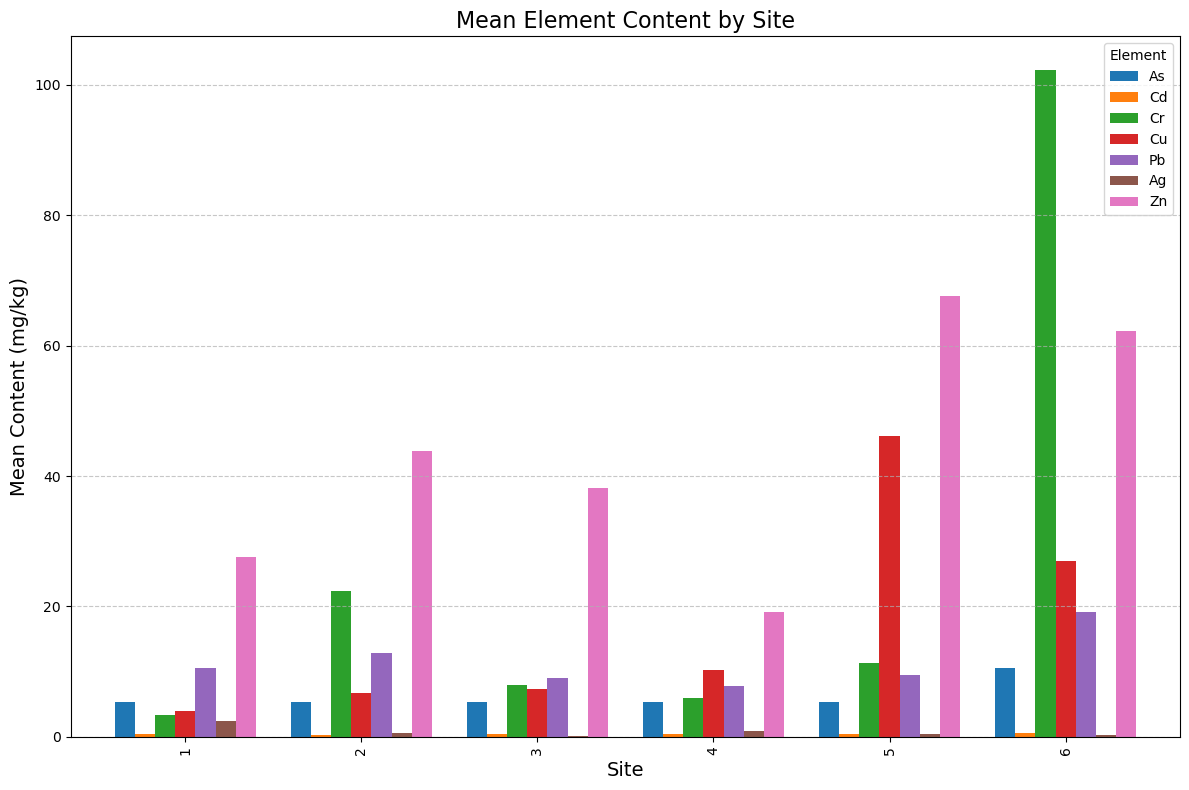

In [15]:

# Filter to include only sites 1-6
filtered_data = cleaned_data_with_na[cleaned_data_with_na['site'].isin(['1', '2', '3', '4', '5', '6'])]

# Group by site and calculate the mean for each element
site_means = filtered_data.groupby('site')[['As', 'Cd', 'Cr', 'Cu', 'Pb', 'Ag', 'Zn']].mean()

bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Define the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the mean content for each site with larger bars
site_means.plot(kind='bar', ax=ax, width=0.8)  # Adjust the width to make bars larger

# Customize the plot
ax.set_title('Mean Element Content by Site', fontsize=16)
ax.set_xlabel('Site', fontsize=14)
ax.set_ylabel('Mean Content (mg/kg)', fontsize=14)
ax.legend(title='Element', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the figure
plt.tight_layout()
plt.show()


C:\Users\punch\AppData\Local\Temp\ipykernel_62660\90056611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total_Metal_Content'] = filtered_data[['As', 'Cd', 'Cr', 'Cu', 'Pb', 'Ag', 'Zn']].sum(axis=1)


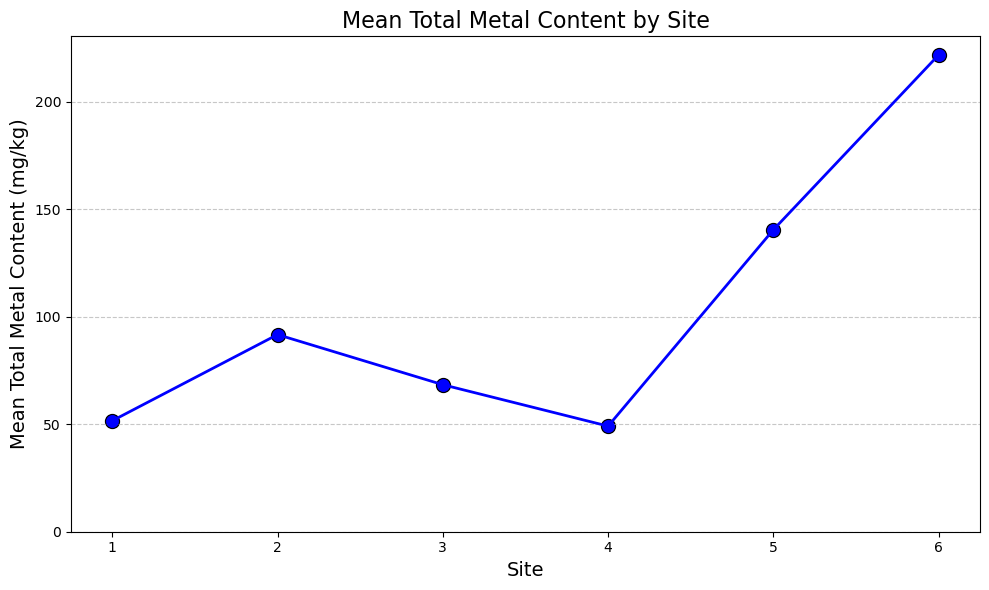

In [22]:

# Filter to include only sites 1-6
filtered_data = cleaned_data_with_na[cleaned_data_with_na['site'].isin(['1', '2', '3', '4', '5', '6'])]

# Calculate the total metal content (sum of selected elements) for each site
filtered_data['Total_Metal_Content'] = filtered_data[['As', 'Cd', 'Cr', 'Cu', 'Pb', 'Ag', 'Zn']].sum(axis=1)
site_total_means = filtered_data.groupby('site')['Total_Metal_Content'].mean()

# Define the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with a line connecting the points
ax.plot(site_total_means.index, site_total_means.values, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
ax.scatter(site_total_means.index, site_total_means.values, color='blue', s=100, edgecolor='black')

# Customize the plot
ax.set_title('Mean Total Metal Content by Site', fontsize=16)
ax.set_xlabel('Site', fontsize=14)
ax.set_ylabel('Mean Total Metal Content (mg/kg)', fontsize=14)
ax.set_ylim(bottom=0)  # Start the y-axis at 0
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the figure
plt.tight_layout()
plt.show()


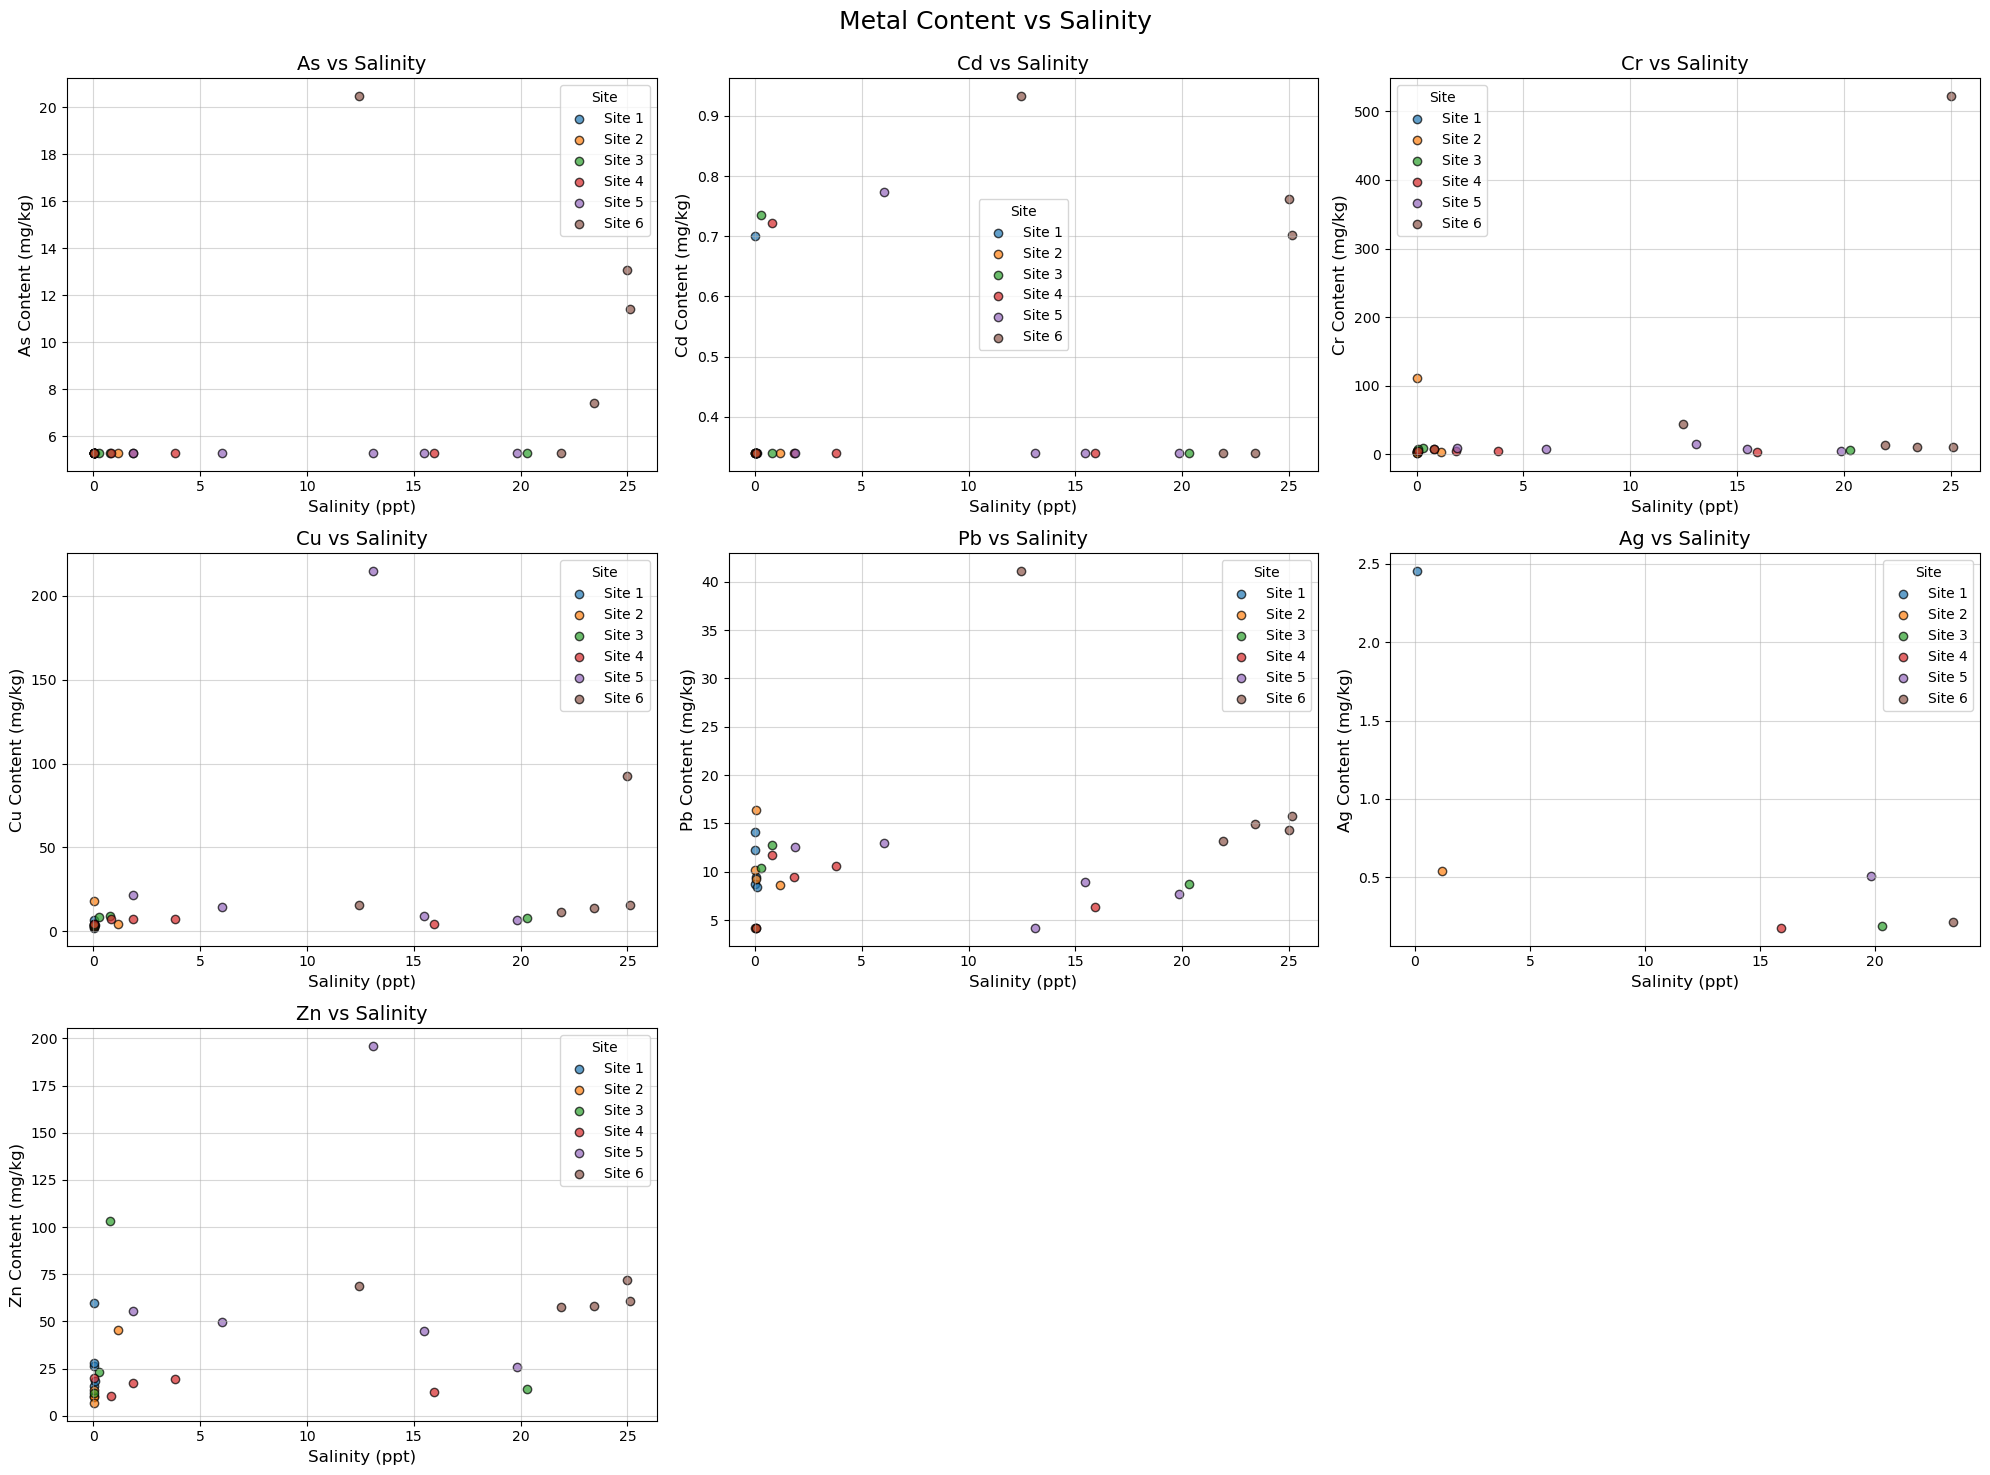

In [19]:
# Define the elements for scatter plots
elements = ['As', 'Cd', 'Cr', 'Cu', 'Pb', 'Ag', 'Zn']

# Define the figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15), sharex=False, sharey=False)
axes = axes.flatten()

# Plot each element against Salinity_mean
for idx, element in enumerate(elements):
    ax = axes[idx]
    for site, site_data in filtered_data.groupby('site'):
        ax.scatter(
            site_data['Salinity_mean'],
            site_data[element],
            label=f'Site {site}',
            alpha=0.7,
            edgecolors='black'
        )
    ax.set_title(f'{element} vs Salinity', fontsize=14)
    ax.set_xlabel('Salinity (ppt)', fontsize=12)
    ax.set_ylabel(f'{element} Content (mg/kg)', fontsize=12)
    ax.legend(title='Site', fontsize=10)
    ax.grid(alpha=0.5)

# Hide unused subplots
for idx in range(len(elements), len(axes)):
    axes[idx].set_visible(False)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Metal Content vs Salinity', fontsize=18)
plt.show()



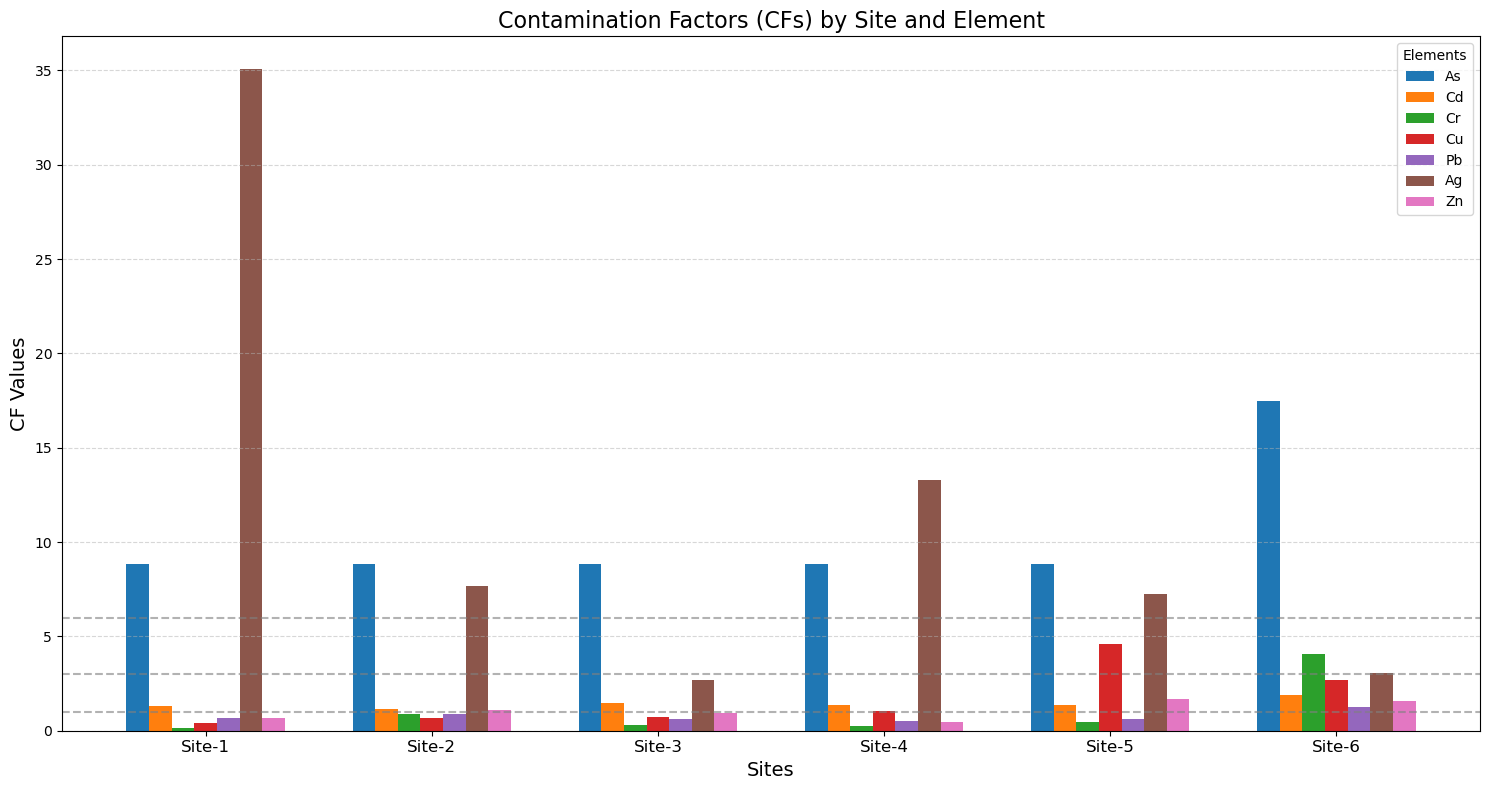

In [20]:

# Data from the table
data = {
    'Sites': ['Site-1', 'Site-2', 'Site-3', 'Site-4', 'Site-5', 'Site-6'],
    'As': [8.83, 8.83, 8.83, 8.83, 8.83, 17.49],
    'Cd': [1.33, 1.13, 1.46, 1.35, 1.37, 1.90],
    'Cr': [0.14, 0.90, 0.32, 0.24, 0.45, 4.09],
    'Cu': [0.39, 0.67, 0.73, 1.02, 4.61, 2.69],
    'Pb': [0.70, 0.86, 0.60, 0.52, 0.63, 1.27],
    'Ag': [35.05, 7.68, 2.67, 13.28, 7.26, 3.06],
    'Zn': [0.69, 1.10, 0.95, 0.48, 1.69, 1.56],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the bar chart without color-coding contamination levels
fig, ax = plt.subplots(figsize=(15, 8))

# Create a bar chart for each element
x_positions = range(len(df['Sites']))
bar_width = 0.1
offsets = [-3, -2, -1, 0, 1, 2, 3]  # Offsets for each element's bar
elements = ['As', 'Cd', 'Cr', 'Cu', 'Pb', 'Ag', 'Zn']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']  # Distinct colors for each element

for i, element in enumerate(elements):
    ax.bar(
        [x + bar_width * offsets[i] for x in x_positions],
        df[element],
        color=colors[i],
        width=bar_width,
        label=element
    )

# Customize the plot
ax.set_title('Contamination Factors (CFs) by Site and Element', fontsize=16)
ax.set_xlabel('Sites', fontsize=14)
ax.set_ylabel('CF Values', fontsize=14)
ax.set_xticks(x_positions)
ax.set_xticklabels(df['Sites'], fontsize=12)
ax.legend(title='Elements', fontsize=10)
ax.axhline(1, color='gray', linestyle='--', alpha=0.6, label='Low Threshold')
ax.axhline(3, color='gray', linestyle='--', alpha=0.6, label='Moderate Threshold')
ax.axhline(6, color='gray', linestyle='--', alpha=0.6, label='High Threshold')
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()
